# Items Prediction Process

### Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import time
from prediction_functions import *
import logging

In [3]:
logging.basicConfig(level=logging.INFO)
logging.getLogger("elasticsearch").setLevel(logging.WARNING)

### Functions

#### Get the data from ES and create a pandas dataframe

In [53]:
q_one = es_to_df("2020-06-09","2020-06-13", 20, "censhare", 'localhost', 9200, 720)
q_two = es_to_df("2020-06-09","2020-06-13", 20, "pic", 'localhost', 9200, 720)

INFO:root:ES to Df: 2.51 time elapsed
INFO:root:ES to Df: 2.79 time elapsed


In [54]:
q_one_size = q_one['size'].values
q_two_size = q_two['size'].values

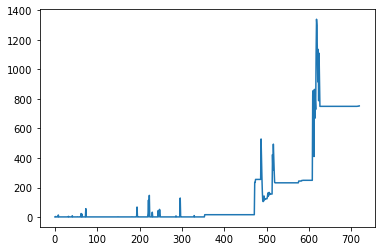

In [55]:
plt.plot(q_one_size)

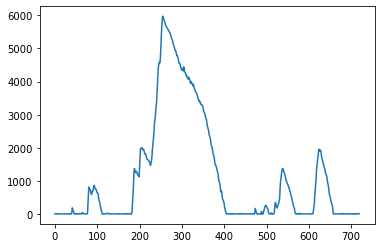

In [56]:
plt.plot(q_two_size)

#### Create the feature enriched dataset for each item

In [57]:
X = create_dataset_predict(q_one, q_two)

INFO:root:753 items in the first queue
INFO:root:9 items in the second queue
INFO:root:762 items in the first and second queue combined
INFO:root:762 items in the first and second queue combined without duplicates
INFO:root:760 samples created in the dataset
INFO:root:Create dataset: 1.37 time elapsed


In [58]:
X[0]

,100169626,Q_size_one,Q_size_two,n_added_two,n_removed_two,Q_start
0,1,865,332,147,48,0
1,2,669,575,285,42,0
2,3,798,728,192,39,0
3,4,729,896,215,47,0
4,5,1104,1062,216,50,0
...,...,...,...,...,...,...
102,103,751,0,0,0,0
103,104,751,0,0,0,0
104,105,751,0,0,0,0
105,106,753,0,0,0,0


#### Padding

In [60]:
X_pad_scaled, X_pad = scale_pad(X, 720, './models/scalerx_outlier25_300_2020-06-09_2020-06-13_50epochs_720steps_20srate.p')

INFO:root:Scaling: 0.87 time elapsed


#### Load Model

In [63]:
final_df = predict_upload(q_two, X, X_pad, X_pad_scaled,'./models/scalery_outlier25_300_2020-06-09_2020-06-13_50epochs_720steps_20srate.p', 'localhost', 
               9200, './models/best_outlier25_300_2020-06-09_2020-06-13_50epochs_720steps_20srate.h5', 'queues-prediction', 20)

10 Elemente hochgeladen
20 Elemente hochgeladen
30 Elemente hochgeladen
40 Elemente hochgeladen
50 Elemente hochgeladen
60 Elemente hochgeladen
70 Elemente hochgeladen
80 Elemente hochgeladen
90 Elemente hochgeladen
100 Elemente hochgeladen
110 Elemente hochgeladen
120 Elemente hochgeladen
130 Elemente hochgeladen
140 Elemente hochgeladen
150 Elemente hochgeladen
160 Elemente hochgeladen
170 Elemente hochgeladen
180 Elemente hochgeladen
190 Elemente hochgeladen
200 Elemente hochgeladen
210 Elemente hochgeladen
220 Elemente hochgeladen
230 Elemente hochgeladen
240 Elemente hochgeladen


INFO:root:Prediction and upload: 6.55 time elapsed


250 Elemente hochgeladen


In [64]:
final_df

,items,size,timestamp
0,100169626 1006833586 1010184859 101412478 1046...,760,2020-06-14T00:00:02.521185+0000
1,100169626 1006833586 1010184859 101412478 1046...,760,2020-06-14T00:10:02.521185+0000
2,100169626 1006833586 1010184859 101412478 1046...,760,2020-06-14T00:20:02.521185+0000
3,100169626 1006833586 1010184859 101412478 1046...,760,2020-06-14T00:30:02.521185+0000
4,10712557 1077597455 1098328035 1104224114 1139...,278,2020-06-14T00:40:02.521185+0000
...,...,...,...
245,1322588522 1324808300 1383210961 1958011728 23...,8,2020-06-15T16:50:02.521185+0000
246,1322588522 1324808300 1958011728 230730953 256...,6,2020-06-15T17:00:02.521185+0000
247,1958011728 230730953 2565529011 4098126226,4,2020-06-15T17:10:02.521185+0000
248,1958011728 2565529011 4098126226,3,2020-06-15T17:20:02.521185+0000


In [65]:
final_df['size'].values

array([760, 760, 760, 760, 278, 275, 275, 271, 267, 267, 266, 265, 265,
       262, 262, 246, 225, 224, 220, 211, 205, 204, 196, 188, 182, 177,
       174, 171, 165, 162, 160, 154, 136, 135, 132, 131, 128, 127, 123,
       101, 100, 100,  98,  97,  90,  78,  67,  65,  62,  60,  59,  59,
        58,  51,  51,  51,  51,  50,  47,  46,  46,  45,  42,  41,  41,
        41,  41,  41,  41,  40,  40,  40,  40,  39,  39,  39,  39,  39,
        39,  39,  39,  39,  39,  39,  39,  37,  37,  36,  36,  35,  35,
        34,  30,  30,  30,  29,  28,  27,  26,  24,  24,  24,  24,  24,
        24,  24,  24,  24,  24,  24,  24,  24,  24,  24,  24,  24,  24,
        24,  23,  23,  23,  23,  23,  23,  23,  22,  22,  22,  22,  22,
        22,  22,  22,  22,  22,  22,  22,  21,  21,  21,  21,  21,  21,
        21,  21,  21,  21,  21,  21,  21,  21,  21,  21,  21,  20,  20,
        20,  20,  20,  20,  20,  20,  20,  20,  20,  20,  20,  20,  20,
        20,  20,  20,  20,  20,  20,  20,  20,  20,  20,  20,  2

In [67]:
q_two_test = es_to_df("2020-06-14","2020-06-16", 20, "pic", 'localhost', 9200, 720)

INFO:root:ES to Df: 2.99 time elapsed


In [68]:
len(final_df)

250

In [69]:
len(q_two_test)

432

In [70]:
real_size = q_two_test['size'].values[:366]

In [71]:
item_size = final_df['size'].values

In [72]:
import matplotlib.pyplot as plt

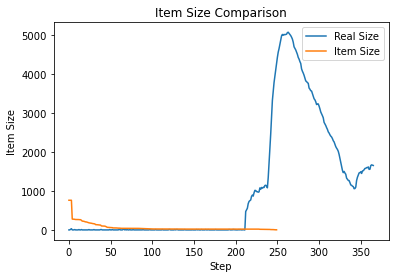

In [73]:
plt.plot(real_size, label='Real Size')
plt.plot(item_size, label='Item Size')
plt.title('Item Size Comparison')
plt.xlabel('Step')
plt.ylabel('Item Size')
plt.legend()
plt.show()